In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.7 MB/s eta 0:00:00


In [ ]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report as cfr
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.svm import SVC

from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.utils import to_categorical

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/notGman/Mini_project/main/13040_2019_200_MOESM2_ESM.csv")
df

,Unnamed,Nr,Date,Time,Ingredient,IsRawMilk,Cells,QValue,Fat,Protein,...,SPC 2962,SPC 2966,SPC 2970,SPC 2974,SPC 2977,SPC 2981,SPC 2985,SPC 2989,SPC 2993,SPC 2997
0,1039,13,3/10/2016,15:20:25,peroxide,no,82,92.89,3.58,3.37,...,0.096824,0.082412,0.067960,0.054418,0.041527,0.030426,0.021521,0.014404,0.008537,0.003582
1,1074,1,5/10/2016,14:20:14,raw,yes,66,91.26,3.47,3.38,...,0.091569,0.077725,0.062887,0.049003,0.036913,0.027039,0.018343,0.010068,0.003159,-0.001910
2,1648,3,31/8/2018,11:08:17,bicarbonate,no,895,91.85,3.51,2.98,...,0.087129,0.073408,0.059220,0.046008,0.034637,0.024646,0.015802,0.008981,0.003809,-0.000720
3,4780,4,22/9/2017,15:41:49,raw,yes,151,86.69,3.40,3.22,...,0.097520,0.083886,0.068863,0.054876,0.043321,0.033540,0.024578,0.016899,0.011012,0.006048
4,4110,1,11/10/2016,15:13:43,raw,yes,527,89.41,3.54,3.17,...,0.088662,0.074045,0.059094,0.045218,0.033200,0.023450,0.015204,0.007179,-0.000310,-0.005550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,1481,1,23/5/2016,11:31:43,raw,yes,347,98.48,3.40,3.29,...,0.091714,0.077592,0.062860,0.049189,0.037669,0.028057,0.019258,0.011206,0.004270,-0.000454
965,1150,2,13/8/2018,14:54:51,sucrose,no,200,81.75,4.10,3.56,...,0.097472,0.080994,0.063711,0.048035,0.034527,0.022658,0.012867,0.004813,-0.002039,-0.007576
966,4669,1,22/9/2017,15:39:17,raw,yes,147,86.00,3.40,3.22,...,0.096722,0.082313,0.067213,0.054163,0.042833,0.032504,0.023497,0.015788,0.009637,0.004912
967,1352,10,14/8/2018,14:33:25,bicarbonate,no,298,88.35,4.15,3.35,...,0.100560,0.084209,0.066859,0.051367,0.038372,0.027638,0.018606,0.010341,0.003644,-0.001038


In [ ]:
df.iloc[[1,0,2,5,10,13,16],4:18]

,Ingredient,IsRawMilk,Cells,QValue,Fat,Protein,Lactose,Solids,FFA,Citrate,FrzPoint,SNF,MUN,Casein
1,raw,yes,66,91.26,3.47,3.38,4.59,12.41,39,1317,0.564,8.97,15.2,2.67
0,peroxide,no,82,92.89,3.58,3.37,4.57,12.51,11,1392,0.564,8.93,30.8,2.61
2,bicarbonate,no,895,91.85,3.51,2.98,4.50,11.98,12,1120,0.522,8.63,1.6,2.27
5,formaldehyde,no,80,89.86,3.54,3.38,4.61,12.52,52,1346,0.568,8.99,17.8,2.64
10,starch,no,45,89.66,3.57,3.33,4.63,12.51,54,1344,0.569,8.95,15.1,2.60
13,peroxide,no,183,91.78,3.90,3.31,4.66,12.87,48,1300,0.577,8.96,16.6,2.60
16,sucrose,no,249,90.07,3.78,3.55,5.27,13.50,36,1445,0.602,10.18,18.2,2.87


In [ ]:
num_col = ['Cells','QValue','Fat','Protein','Lactose','Solids','FFA','Citrate','FrzPoint','SNF','MUN','Casein']
cat_col = ['Ingredient','IsRawMilk']

In [ ]:
le = LabelEncoder()
df['Ingredient'] = le.fit_transform(df['Ingredient'])
df['IsRawMilk'] = le.fit_transform(df['IsRawMilk'])
df

,Unnamed,Nr,Date,Time,Ingredient,IsRawMilk,Cells,QValue,Fat,Protein,...,SPC 2962,SPC 2966,SPC 2970,SPC 2974,SPC 2977,SPC 2981,SPC 2985,SPC 2989,SPC 2993,SPC 2997
0,1039,13,3/10/2016,15:20:25,2,0,82,92.89,3.58,3.37,...,0.096824,0.082412,0.067960,0.054418,0.041527,0.030426,0.021521,0.014404,0.008537,0.003582
1,1074,1,5/10/2016,14:20:14,3,1,66,91.26,3.47,3.38,...,0.091569,0.077725,0.062887,0.049003,0.036913,0.027039,0.018343,0.010068,0.003159,-0.001910
2,1648,3,31/8/2018,11:08:17,0,0,895,91.85,3.51,2.98,...,0.087129,0.073408,0.059220,0.046008,0.034637,0.024646,0.015802,0.008981,0.003809,-0.000720
3,4780,4,22/9/2017,15:41:49,3,1,151,86.69,3.40,3.22,...,0.097520,0.083886,0.068863,0.054876,0.043321,0.033540,0.024578,0.016899,0.011012,0.006048
4,4110,1,11/10/2016,15:13:43,3,1,527,89.41,3.54,3.17,...,0.088662,0.074045,0.059094,0.045218,0.033200,0.023450,0.015204,0.007179,-0.000310,-0.005550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,1481,1,23/5/2016,11:31:43,3,1,347,98.48,3.40,3.29,...,0.091714,0.077592,0.062860,0.049189,0.037669,0.028057,0.019258,0.011206,0.004270,-0.000454
965,1150,2,13/8/2018,14:54:51,5,0,200,81.75,4.10,3.56,...,0.097472,0.080994,0.063711,0.048035,0.034527,0.022658,0.012867,0.004813,-0.002039,-0.007576
966,4669,1,22/9/2017,15:39:17,3,1,147,86.00,3.40,3.22,...,0.096722,0.082313,0.067213,0.054163,0.042833,0.032504,0.023497,0.015788,0.009637,0.004912
967,1352,10,14/8/2018,14:33:25,0,0,298,88.35,4.15,3.35,...,0.100560,0.084209,0.066859,0.051367,0.038372,0.027638,0.018606,0.010341,0.003644,-0.001038


In [ ]:
bin_x = df[['Cells', 'QValue', 'Fat', 'Protein', 'Lactose', 'Solids', 'FFA', 'Citrate', 'FrzPoint', 'SNF', 'MUN', 'Casein']]
bin_y = df['IsRawMilk']

In [ ]:
mul_x = df[['Cells', 'QValue', 'Fat', 'Protein', 'Lactose', 'Solids', 'FFA', 'Citrate', 'FrzPoint', 'SNF', 'MUN', 'Casein']]
mul_y = df['Ingredient']

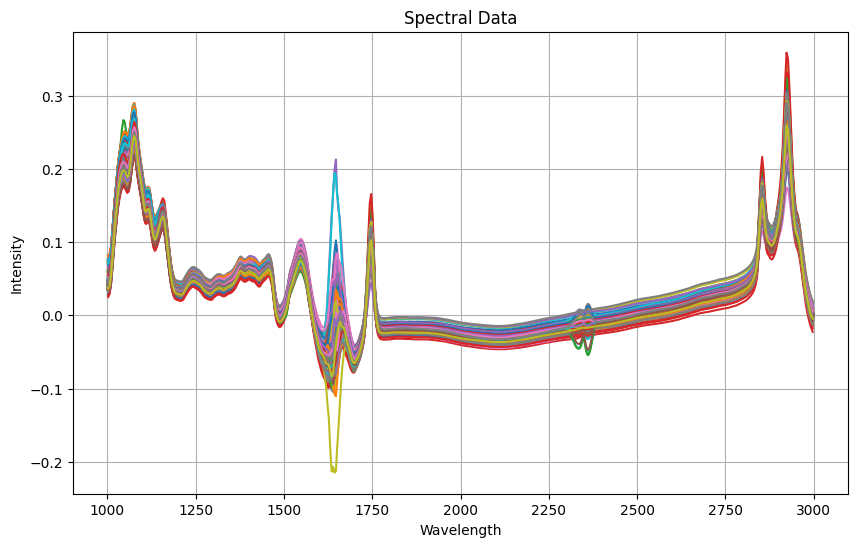

In [ ]:
data_cnn = df.iloc[:,18:]

data = np.array(data_cnn)

# Wavelengths for the x-axis
wavelengths = np.array([1002, 1006, 1010, 1014, 1018, 1022, 1026, 1029, 1033, 1037, 1041, 1045, 1049, 1053, 1056, 1060, 1064, 1068, 1072, 1076, 1080, 1083, 1087, 1091, 1095, 1099, 1103, 1107, 1110, 1114, 1118, 1122, 1126, 1130, 1134, 1137, 1141, 1145, 1149, 1153, 1157, 1161, 1164, 1168, 1172, 1176, 1180, 1184, 1188, 1191, 1195, 1199, 1203, 1207, 1211, 1215, 1218, 1222, 1226, 1230, 1234, 1238, 1242, 1245, 1249, 1253, 1257, 1261, 1265, 1269, 1272, 1276, 1280, 1284, 1288, 1292, 1296, 1299, 1303, 1307, 1311, 1315, 1319, 1323, 1326, 1330, 1334, 1338, 1342, 1346, 1350, 1353, 1357, 1361, 1365, 1369, 1373, 1377, 1380, 1384, 1388, 1392, 1396, 1400, 1404, 1407, 1411, 1415, 1419, 1423, 1427, 1431, 1434, 1438, 1442, 1446, 1450, 1454, 1458, 1461, 1465, 1469, 1473, 1477, 1481, 1485, 1488, 1492, 1496, 1500, 1504, 1508, 1512, 1515, 1519, 1523, 1527, 1531, 1535, 1539, 1542, 1546, 1550, 1554, 1558, 1562, 1566, 1569, 1573, 1577, 1581, 1585, 1589, 1593, 1596, 1600, 1604, 1608, 1612, 1616, 1620, 1623, 1627, 1631, 1635, 1639, 1643, 1647, 1650, 1654, 1658, 1662, 1666, 1670, 1674, 1677, 1681, 1685, 1689, 1693, 1697, 1701, 1704, 1708, 1712, 1716, 1720, 1724, 1728, 1731, 1735, 1739, 1743, 1747, 1751, 1755, 1758, 1762, 1766, 1770, 1774, 1778, 1782, 1785, 1789, 1793, 1797, 1801, 1805, 1809, 1812, 1816, 1820, 1824, 1828, 1832, 1836, 1839, 1843, 1847, 1851, 1855, 1859, 1863, 1866, 1870, 1874, 1878, 1882, 1886, 1890, 1893, 1897, 1901, 1905, 1909, 1913, 1917, 1920, 1924, 1928, 1932, 1936, 1940, 1944, 1947, 1951, 1955, 1959, 1963, 1967, 1971, 1974, 1978, 1982, 1986, 1990, 1994, 1998, 2001, 2005, 2009, 2013, 2017, 2021, 2025, 2028, 2032, 2036, 2040, 2044, 2048, 2052, 2055, 2059, 2063, 2067, 2071, 2075, 2079, 2082, 2086, 2090, 2094, 2098, 2102, 2106, 2109, 2113, 2117, 2121, 2125, 2129, 2133, 2136, 2140, 2144, 2148, 2152, 2156, 2160, 2163, 2167, 2171, 2175, 2179, 2183, 2187, 2190, 2194, 2198, 2202, 2206, 2210, 2214, 2217, 2221, 2225, 2229, 2233, 2237, 2241, 2244, 2248, 2252, 2256, 2260, 2264, 2268, 2271, 2275, 2279, 2283, 2287, 2291, 2295, 2298, 2302, 2306, 2310, 2314, 2318, 2322, 2325, 2329, 2333, 2337, 2341, 2345, 2349, 2352, 2356, 2360, 2364, 2368, 2372, 2376, 2379, 2383, 2387, 2391, 2395, 2399, 2403, 2406, 2410, 2414, 2418, 2422, 2426, 2430, 2433, 2437, 2441, 2445, 2449, 2453, 2457, 2460, 2464, 2468, 2472, 2476, 2480, 2484, 2487, 2491, 2495, 2499, 2503, 2507, 2511, 2514, 2518, 2522, 2526, 2530, 2534, 2538, 2541, 2545, 2549, 2553, 2557, 2561, 2565, 2568, 2572, 2576, 2580, 2584, 2588, 2592, 2595, 2599, 2603, 2607, 2611, 2615, 2619, 2622, 2626, 2630, 2634, 2638, 2642, 2646, 2649, 2653, 2657, 2661, 2665, 2669, 2673, 2676, 2680, 2684, 2688, 2692, 2696, 2700, 2704, 2707, 2711, 2715, 2719, 2723, 2727, 2731, 2734, 2738, 2742, 2746, 2750, 2754, 2758, 2761, 2765, 2769, 2773, 2777, 2781, 2785, 2788, 2792, 2796, 2800, 2804, 2808, 2812, 2815, 2819, 2823, 2827, 2831, 2835, 2839, 2842, 2846, 2850, 2854, 2858, 2862, 2866, 2869, 2873, 2877, 2881, 2885, 2889, 2893, 2896, 2900, 2904, 2908, 2912, 2916, 2920, 2923, 2927, 2931, 2935, 2939, 2943, 2947, 2950, 2954, 2958, 2962, 2966, 2970, 2974, 2977, 2981, 2985, 2989, 2993, 2997])

# Plotting
plt.figure(figsize=(10, 6))
for i in range(len(data)):
    plt.plot(wavelengths, data[i], label=f'SPC {i+1}')

plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Spectral Data')
plt.grid(True)
plt.show()

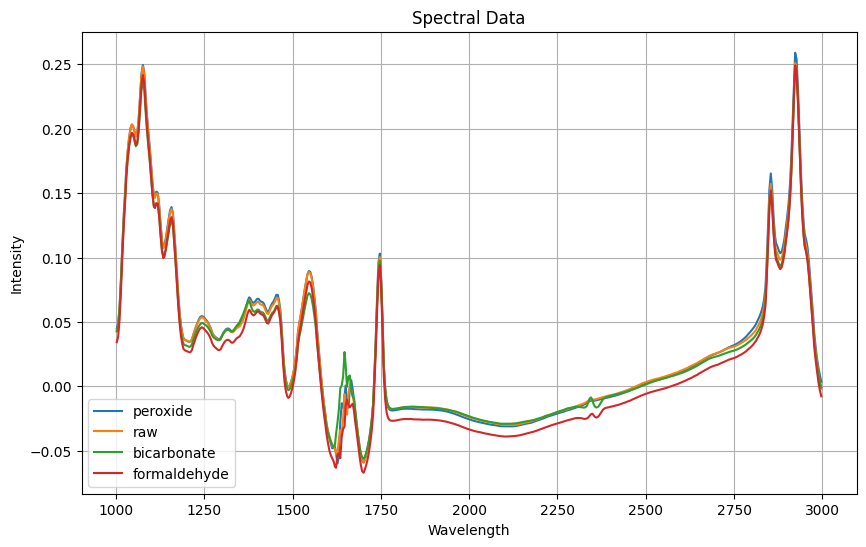

In [ ]:
data_cnn = df.iloc[:,18:]
# data_cnn.head(3)
data = np.array(data_cnn.iloc[[0,1,2,5]])

# Wavelengths for the x-axis
wavelengths = np.array([1002, 1006, 1010, 1014, 1018, 1022, 1026, 1029, 1033, 1037, 1041, 1045, 1049, 1053, 1056, 1060, 1064, 1068, 1072, 1076, 1080, 1083, 1087, 1091, 1095, 1099, 1103, 1107, 1110, 1114, 1118, 1122, 1126, 1130, 1134, 1137, 1141, 1145, 1149, 1153, 1157, 1161, 1164, 1168, 1172, 1176, 1180, 1184, 1188, 1191, 1195, 1199, 1203, 1207, 1211, 1215, 1218, 1222, 1226, 1230, 1234, 1238, 1242, 1245, 1249, 1253, 1257, 1261, 1265, 1269, 1272, 1276, 1280, 1284, 1288, 1292, 1296, 1299, 1303, 1307, 1311, 1315, 1319, 1323, 1326, 1330, 1334, 1338, 1342, 1346, 1350, 1353, 1357, 1361, 1365, 1369, 1373, 1377, 1380, 1384, 1388, 1392, 1396, 1400, 1404, 1407, 1411, 1415, 1419, 1423, 1427, 1431, 1434, 1438, 1442, 1446, 1450, 1454, 1458, 1461, 1465, 1469, 1473, 1477, 1481, 1485, 1488, 1492, 1496, 1500, 1504, 1508, 1512, 1515, 1519, 1523, 1527, 1531, 1535, 1539, 1542, 1546, 1550, 1554, 1558, 1562, 1566, 1569, 1573, 1577, 1581, 1585, 1589, 1593, 1596, 1600, 1604, 1608, 1612, 1616, 1620, 1623, 1627, 1631, 1635, 1639, 1643, 1647, 1650, 1654, 1658, 1662, 1666, 1670, 1674, 1677, 1681, 1685, 1689, 1693, 1697, 1701, 1704, 1708, 1712, 1716, 1720, 1724, 1728, 1731, 1735, 1739, 1743, 1747, 1751, 1755, 1758, 1762, 1766, 1770, 1774, 1778, 1782, 1785, 1789, 1793, 1797, 1801, 1805, 1809, 1812, 1816, 1820, 1824, 1828, 1832, 1836, 1839, 1843, 1847, 1851, 1855, 1859, 1863, 1866, 1870, 1874, 1878, 1882, 1886, 1890, 1893, 1897, 1901, 1905, 1909, 1913, 1917, 1920, 1924, 1928, 1932, 1936, 1940, 1944, 1947, 1951, 1955, 1959, 1963, 1967, 1971, 1974, 1978, 1982, 1986, 1990, 1994, 1998, 2001, 2005, 2009, 2013, 2017, 2021, 2025, 2028, 2032, 2036, 2040, 2044, 2048, 2052, 2055, 2059, 2063, 2067, 2071, 2075, 2079, 2082, 2086, 2090, 2094, 2098, 2102, 2106, 2109, 2113, 2117, 2121, 2125, 2129, 2133, 2136, 2140, 2144, 2148, 2152, 2156, 2160, 2163, 2167, 2171, 2175, 2179, 2183, 2187, 2190, 2194, 2198, 2202, 2206, 2210, 2214, 2217, 2221, 2225, 2229, 2233, 2237, 2241, 2244, 2248, 2252, 2256, 2260, 2264, 2268, 2271, 2275, 2279, 2283, 2287, 2291, 2295, 2298, 2302, 2306, 2310, 2314, 2318, 2322, 2325, 2329, 2333, 2337, 2341, 2345, 2349, 2352, 2356, 2360, 2364, 2368, 2372, 2376, 2379, 2383, 2387, 2391, 2395, 2399, 2403, 2406, 2410, 2414, 2418, 2422, 2426, 2430, 2433, 2437, 2441, 2445, 2449, 2453, 2457, 2460, 2464, 2468, 2472, 2476, 2480, 2484, 2487, 2491, 2495, 2499, 2503, 2507, 2511, 2514, 2518, 2522, 2526, 2530, 2534, 2538, 2541, 2545, 2549, 2553, 2557, 2561, 2565, 2568, 2572, 2576, 2580, 2584, 2588, 2592, 2595, 2599, 2603, 2607, 2611, 2615, 2619, 2622, 2626, 2630, 2634, 2638, 2642, 2646, 2649, 2653, 2657, 2661, 2665, 2669, 2673, 2676, 2680, 2684, 2688, 2692, 2696, 2700, 2704, 2707, 2711, 2715, 2719, 2723, 2727, 2731, 2734, 2738, 2742, 2746, 2750, 2754, 2758, 2761, 2765, 2769, 2773, 2777, 2781, 2785, 2788, 2792, 2796, 2800, 2804, 2808, 2812, 2815, 2819, 2823, 2827, 2831, 2835, 2839, 2842, 2846, 2850, 2854, 2858, 2862, 2866, 2869, 2873, 2877, 2881, 2885, 2889, 2893, 2896, 2900, 2904, 2908, 2912, 2916, 2920, 2923, 2927, 2931, 2935, 2939, 2943, 2947, 2950, 2954, 2958, 2962, 2966, 2970, 2974, 2977, 2981, 2985, 2989, 2993, 2997])

# Plotting
plt.figure(figsize=(10, 6))
for i in range(len(data)):
    plt.plot(wavelengths, data[i], label=f'SPC {i+1}')

custom_labels = ['peroxide','raw','bicarbonate','formaldehyde']
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Spectral Data')
plt.legend(custom_labels)
plt.grid(True)
plt.show()

In [ ]:
data = data_cnn
X = data.values
y = bin_y.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train_6535, X_test_6535, y_train_6535, y_test_6535 = train_test_split(X_scaled, y, test_size=0.35, random_state=42)
X_train_7525, X_test_7525, y_train_7525, y_test_7525 = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
X_train_8020, X_test_8020, y_train_8020, y_test_8020 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# CNN Bin
X_train = X_train_6535
X_test = X_test_6535
y_train = y_train_6535
y_test = y_test_6535

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    Conv1D(filters=32, kernel_size=5, activation='linear', input_shape=(X_train.shape[1], 1)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(1024),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

initial_learning_rate = 0.001
lr_schedule = LearningRateScheduler(lambda epoch: initial_learning_rate * 0.9 ** epoch)
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_schedule])
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/100
20/20 [==============================] - 11s 445ms/step - loss: 1.1641 - accuracy: 0.7170 - val_loss: 0.4682 - val_accuracy: 0.7735 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - 7s 364ms/step - loss: 0.3887 - accuracy: 0.8331 - val_loss: 0.4897 - val_accuracy: 0.7353 - lr: 9.0000e-04
Epoch 3/100
20/20 [==============================] - 9s 423ms/step - loss: 0.3210 - accuracy: 0.8696 - val_loss: 0.5558 - val_accuracy: 0.6382 - lr: 8.1000e-04
Epoch 4/100
20/20 [==============================] - 8s 413ms/step - loss: 0.2830 - accuracy: 0.8871 - val_loss: 0.5723 - val_accuracy: 0.6029 - lr: 7.2900e-04
Epoch 5/100
20/20 [==============================] - 8s 421ms/step - loss: 0.2329 - accuracy: 0.9173 - val_loss: 0.5940 - val_accuracy: 0.5794 - lr: 6.5610e-04
Epoch 6/100
20/20 [==============================] - 9s 449ms/step - loss: 0.1817 - accuracy: 0.9237 - val_loss: 0.6012 - val_accuracy: 0.5882 - lr: 5.9049e-04
Epoch 7/100
20/20 [========================

In [ ]:
# CNN Bin
X_train = X_train_7525
X_test = X_test_7525
y_train = y_train_7525
y_test = y_test_7525

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    Conv1D(filters=32, kernel_size=5, activation='linear', input_shape=(X_train.shape[1], 1)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(1024),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

initial_learning_rate = 0.001
lr_schedule = LearningRateScheduler(lambda epoch: initial_learning_rate * 0.9 ** epoch)
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_schedule])
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/100
23/23 [==============================] - 12s 433ms/step - loss: 0.9920 - accuracy: 0.7397 - val_loss: 0.4824 - val_accuracy: 0.7449 - lr: 0.0010
Epoch 2/100
23/23 [==============================] - 10s 417ms/step - loss: 0.4047 - accuracy: 0.8209 - val_loss: 0.4979 - val_accuracy: 0.8313 - lr: 9.0000e-04
Epoch 3/100
23/23 [==============================] - 10s 420ms/step - loss: 0.3246 - accuracy: 0.8636 - val_loss: 0.4918 - val_accuracy: 0.8889 - lr: 8.1000e-04
Epoch 4/100
23/23 [==============================] - 9s 374ms/step - loss: 0.2969 - accuracy: 0.8774 - val_loss: 0.5281 - val_accuracy: 0.7531 - lr: 7.2900e-04
Epoch 5/100
23/23 [==============================] - 10s 421ms/step - loss: 0.2079 - accuracy: 0.9311 - val_loss: 0.4983 - val_accuracy: 0.8189 - lr: 6.5610e-04
Epoch 6/100
23/23 [==============================] - 10s 449ms/step - loss: 0.1549 - accuracy: 0.9325 - val_loss: 0.4943 - val_accuracy: 0.8025 - lr: 5.9049e-04
Epoch 7/100
23/23 [====================

In [ ]:
# CNN Bin
X_train = X_train_8020
X_test = X_test_8020
y_train = y_train_8020
y_test = y_test_8020

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    Conv1D(filters=32, kernel_size=5, activation='linear', input_shape=(X_train.shape[1], 1)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(1024),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

initial_learning_rate = 0.001
lr_schedule = LearningRateScheduler(lambda epoch: initial_learning_rate * 0.9 ** epoch)
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_schedule])

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/100
25/25 [==============================] - 12s 425ms/step - loss: 1.4435 - accuracy: 0.6981 - val_loss: 0.4790 - val_accuracy: 0.7526 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 11s 433ms/step - loss: 0.4845 - accuracy: 0.8052 - val_loss: 0.5458 - val_accuracy: 0.6443 - lr: 9.0000e-04
Epoch 3/100
25/25 [==============================] - 10s 392ms/step - loss: 0.3819 - accuracy: 0.8413 - val_loss: 0.6313 - val_accuracy: 0.5619 - lr: 8.1000e-04
Epoch 4/100
25/25 [==============================] - 9s 347ms/step - loss: 0.3105 - accuracy: 0.8697 - val_loss: 0.7119 - val_accuracy: 0.5361 - lr: 7.2900e-04
Epoch 5/100
25/25 [==============================] - 11s 422ms/step - loss: 0.2986 - accuracy: 0.8826 - val_loss: 0.7519 - val_accuracy: 0.5258 - lr: 6.5610e-04
Epoch 6/100
25/25 [==============================] - 10s 409ms/step - loss: 0.2373 - accuracy: 0.9058 - val_loss: 0.7420 - val_accuracy: 0.5258 - lr: 5.9049e-04
Epoch 7/100
25/25 [====================

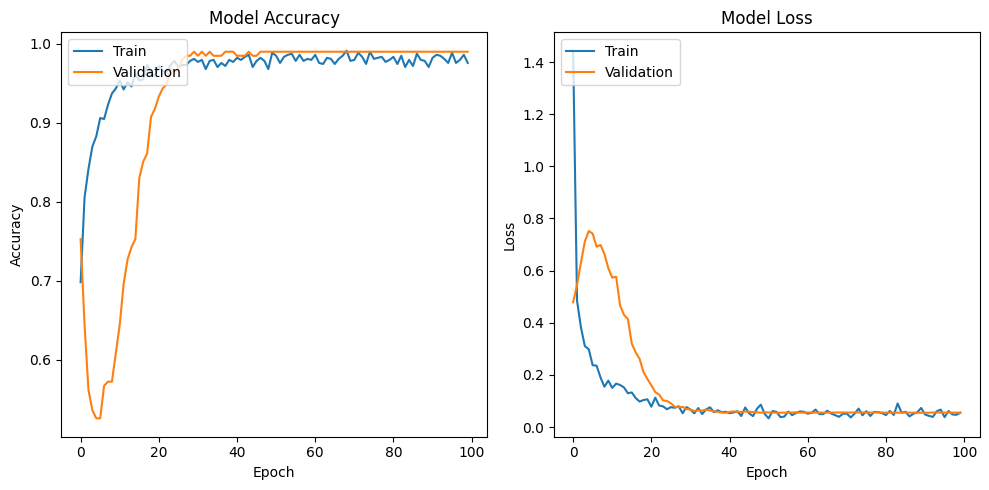

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])  # Use 'accuracy' for training accuracy
plt.plot(history.history['val_accuracy'])  # Use 'val_accuracy' for validation accuracy
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# LSTM Bin
X_train = X_train_8020
X_test = X_test_8020
y_train = y_train_8020
y_test = y_test_8020

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.5),
    LSTM(units=64, return_sequences=True),
    Dropout(0.5),
    LSTM(units=64),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=64)

_, val_acc = model.evaluate(X_test, y_test)
print("Validation Accuracy:", val_acc * 100)


Epoch 1/100
13/13 [==============================] - 22s 1s/step - loss: 0.6752 - accuracy: 0.6077
Epoch 2/100
13/13 [==============================] - 15s 1s/step - loss: 0.6483 - accuracy: 0.6413
Epoch 3/100
13/13 [==============================] - 15s 1s/step - loss: 0.6450 - accuracy: 0.6374
Epoch 4/100
13/13 [==============================] - 15s 1s/step - loss: 0.6380 - accuracy: 0.6542
Epoch 5/100
13/13 [==============================] - 15s 1s/step - loss: 0.6276 - accuracy: 0.6568
Epoch 6/100
13/13 [==============================] - 15s 1s/step - loss: 0.6304 - accuracy: 0.6400
Epoch 7/100
13/13 [==============================] - 15s 1s/step - loss: 0.6252 - accuracy: 0.6490
Epoch 8/100
13/13 [==============================] - 15s 1s/step - loss: 0.6186 - accuracy: 0.6361
Epoch 9/100
13/13 [==============================] - 14s 1s/step - loss: 0.6131 - accuracy: 0.6671
Epoch 10/100
13/13 [==============================] - 15s 1s/step - loss: 0.6147 - accuracy: 0.6542
Epoch 11/

Epoch 1/100
12/12 [==============================] - 35s 2s/step - loss: 0.6735 - accuracy: 0.6047 - val_loss: 0.6628 - val_accuracy: 0.6379
Epoch 2/100
12/12 [==============================] - 14s 1s/step - loss: 0.6562 - accuracy: 0.6391 - val_loss: 0.6438 - val_accuracy: 0.6461
Epoch 3/100
12/12 [==============================] - 13s 1s/step - loss: 0.6411 - accuracy: 0.6377 - val_loss: 0.6475 - val_accuracy: 0.6379
Epoch 4/100
12/12 [==============================] - 14s 1s/step - loss: 0.6443 - accuracy: 0.6460 - val_loss: 0.6341 - val_accuracy: 0.6543
Epoch 5/100
12/12 [==============================] - 13s 1s/step - loss: 0.6392 - accuracy: 0.6336 - val_loss: 0.6345 - val_accuracy: 0.6502
Epoch 6/100
12/12 [==============================] - 13s 1s/step - loss: 0.6272 - accuracy: 0.6446 - val_loss: 0.6256 - val_accuracy: 0.6584
Epoch 7/100
12/12 [==============================] - 13s 1s/step - loss: 0.6221 - accuracy: 0.6598 - val_loss: 0.6287 - val_accuracy: 0.6502
Epoch 8/100
1

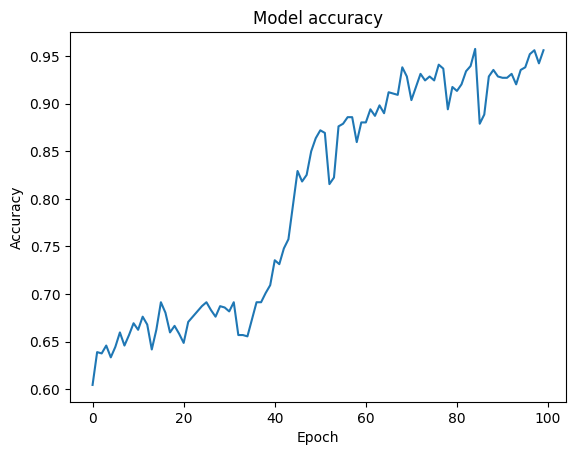

In [ ]:
# LSTM Bin
X_train = X_train_7525
X_test = X_test_7525
y_train = y_train_7525
y_test = y_test_7525

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.5),
    LSTM(units=64, return_sequences=True),
    Dropout(0.5),
    LSTM(units=64),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

_, val_acc = model.evaluate(X_test, y_test)
print("Validation Accuracy:", val_acc * 100)




KeyError: 'accuracy'

In [ ]:
# LSTM Bin
X_train = X_train_6535
X_test = X_test_6535
y_train = y_train_6535
y_test = y_test_6535

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.5),
    LSTM(units=64, return_sequences=True),
    Dropout(0.5),
    LSTM(units=64),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

optimizer = Adam(lr=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=64)

_, val_acc = model.evaluate(X_test, y_test)
print("Validation Accuracy:", val_acc * 100)


Epoch 1/100
10/10 [==============================] - 20s 1s/step - loss: 0.6889 - accuracy: 0.5262
Epoch 2/100
10/10 [==============================] - 11s 1s/step - loss: 0.6690 - accuracy: 0.6169
Epoch 3/100
10/10 [==============================] - 11s 1s/step - loss: 0.6624 - accuracy: 0.6280
Epoch 4/100
10/10 [==============================] - 10s 1s/step - loss: 0.6490 - accuracy: 0.6343
Epoch 5/100
10/10 [==============================] - 11s 1s/step - loss: 0.6488 - accuracy: 0.6328
Epoch 6/100
10/10 [==============================] - 11s 1s/step - loss: 0.6457 - accuracy: 0.6328
Epoch 7/100
10/10 [==============================] - 12s 1s/step - loss: 0.6390 - accuracy: 0.6359
Epoch 8/100
10/10 [==============================] - 11s 1s/step - loss: 0.6266 - accuracy: 0.6614
Epoch 9/100
10/10 [==============================] - 12s 1s/step - loss: 0.6407 - accuracy: 0.6169
Epoch 10/100
10/10 [==============================] - 11s 1s/step - loss: 0.6274 - accuracy: 0.6328
Epoch 11/

In [ ]:
data = data_cnn
X1 = data.values
y1 = mul_y.values

scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

In [ ]:
X1_train_6535, X1_test_6535, y1_train_6535, y1_test_6535 = train_test_split(X1_scaled, y1, test_size=0.35, random_state=42)
X1_train_7525, X1_test_7525, y1_train_7525, y1_test_7525 = train_test_split(X1_scaled, y1, test_size=0.25, random_state=42)
X1_train_8020, X1_test_8020, y1_train_8020, y1_test_8020 = train_test_split(X1_scaled, y1, test_size=0.2, random_state=42)

In [ ]:
#LSTM Mul
X_train_2 = X_train_8020
X_test_2 = X_test_8020
y_train_2 = y_train_8020
y_test_2 = y_test_8020

num_classes = 6
y_train_2 = to_categorical(y_train_2, num_classes=num_classes)
y_test_2 = to_categorical(y_test_2, num_classes=num_classes)

X_train_reshaped = X_train_2.reshape(-1, X_train_2.shape[-1])
X_test_reshaped = X_test_2.reshape(-1, X_test_2.shape[-1])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

X_train_scaled = X_train_scaled.reshape(X_train_2.shape)
X_test_scaled = X_test_scaled.reshape(X_test_2.shape)

model_2 = Sequential([
    LSTM(units=128, return_sequences=True, input_shape=(X_train_2.shape[1], 1)),
    Dropout(0.3),
    LSTM(units=128, return_sequences=True),
    Dropout(0.3),
    LSTM(units=128),
    Dropout(0.3),
    Dense(units=num_classes, activation='softmax')
])

optimizer = Adam(lr=0.0001)
model_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model_2.fit(X_train_2, y_train_2, epochs=50, batch_size=64, validation_split=0.1)

_, test_acc_2 = model_2.evaluate(X_test_2, y_test_2)
print("Model 2 Test Accuracy:", test_acc_2 * 100)

Epoch 1/50
11/11 [==============================] - 39s 3s/step - loss: 1.3626 - accuracy: 0.5438 - val_loss: 0.6659 - val_accuracy: 0.6795
Epoch 2/50
11/11 [==============================] - 32s 3s/step - loss: 0.7194 - accuracy: 0.5280 - val_loss: 0.6459 - val_accuracy: 0.5256
Epoch 3/50
11/11 [==============================] - 32s 3s/step - loss: 0.7057 - accuracy: 0.5710 - val_loss: 0.6290 - val_accuracy: 0.6538
Epoch 4/50
11/11 [==============================] - 32s 3s/step - loss: 0.6893 - accuracy: 0.5725 - val_loss: 0.6183 - val_accuracy: 0.6923
Epoch 5/50
11/11 [==============================] - 34s 3s/step - loss: 0.6625 - accuracy: 0.6126 - val_loss: 0.6149 - val_accuracy: 0.7051
Epoch 6/50
11/11 [==============================] - 32s 3s/step - loss: 0.6441 - accuracy: 0.6227 - val_loss: 0.6184 - val_accuracy: 0.7051
Epoch 7/50
11/11 [==============================] - 33s 3s/step - loss: 0.6296 - accuracy: 0.6571 - val_loss: 0.6379 - val_accuracy: 0.6667
Epoch 8/50
11/11 [==

In [ ]:
# CNN mul
X1_train = X1_train_6535
X1_test = X1_test_6535
y1_train = y1_train_6535
y1_test = y1_test_6535

X1_train = X1_train.reshape(X1_train.shape[0], X1_train.shape[1], 1)
X1_test = X1_test.reshape(X1_test.shape[0], X1_test.shape[1], 1)

y1_train_encoded = to_categorical(y1_train)
y1_test_encoded = to_categorical(y1_test)

num_classes = y1_train_encoded.shape[1]

model = Sequential([
    Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(X1_train.shape[1], 1)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.25),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

initial_learning_rate = 0.001
lr_schedule = LearningRateScheduler(lambda epoch: initial_learning_rate * 0.9 ** epoch)
optimizer = Adam(learning_rate=initial_learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X1_train, y1_train_encoded, epochs=100, batch_size=32, validation_data=(X1_test, y1_test_encoded), callbacks=[lr_schedule])

loss, accuracy = model.evaluate(X1_test, y1_test_encoded)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/100
20/20 [==============================] - 11s 326ms/step - loss: 1.8423 - accuracy: 0.5151 - val_loss: 1.3929 - val_accuracy: 0.6353 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - 3s 156ms/step - loss: 1.2588 - accuracy: 0.6359 - val_loss: 1.2541 - val_accuracy: 0.6853 - lr: 9.0000e-04
Epoch 3/100
20/20 [==============================] - 3s 149ms/step - loss: 0.8812 - accuracy: 0.7218 - val_loss: 1.2651 - val_accuracy: 0.6647 - lr: 8.1000e-04
Epoch 4/100
20/20 [==============================] - 4s 190ms/step - loss: 0.8061 - accuracy: 0.7742 - val_loss: 1.2916 - val_accuracy: 0.6647 - lr: 7.2900e-04
Epoch 5/100
20/20 [==============================] - 3s 167ms/step - loss: 0.5641 - accuracy: 0.8076 - val_loss: 1.3383 - val_accuracy: 0.6471 - lr: 6.5610e-04
Epoch 6/100
20/20 [==============================] - 3s 152ms/step - loss: 0.4882 - accuracy: 0.8553 - val_loss: 1.3056 - val_accuracy: 0.6176 - lr: 5.9049e-04
Epoch 7/100
20/20 [========================

In [ ]:
# CNN mul
X1_train = X1_train_7525
X1_test = X1_test_7525
y1_train = y1_train_7525
y1_test = y1_test_7525

X1_train = X1_train.reshape(X1_train.shape[0], X1_train.shape[1], 1)
X1_test = X1_test.reshape(X1_test.shape[0], X1_test.shape[1], 1)

y1_train_encoded = to_categorical(y1_train)
y1_test_encoded = to_categorical(y1_test)

num_classes = y1_train_encoded.shape[1]

model = Sequential([
    Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(X1_train.shape[1], 1)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.25),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

initial_learning_rate = 0.001
lr_schedule = LearningRateScheduler(lambda epoch: initial_learning_rate * 0.9 ** epoch)
optimizer = Adam(learning_rate=initial_learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X1_train, y1_train_encoded, epochs=100, batch_size=32, validation_data=(X1_test, y1_test_encoded), callbacks=[lr_schedule])

loss, accuracy = model.evaluate(X1_test, y1_test_encoded)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/100
23/23 [==============================] - 6s 147ms/step - loss: 1.8211 - accuracy: 0.4862 - val_loss: 1.3818 - val_accuracy: 0.6708 - lr: 0.0010
Epoch 2/100
23/23 [==============================] - 3s 131ms/step - loss: 1.0094 - accuracy: 0.6818 - val_loss: 1.3683 - val_accuracy: 0.6831 - lr: 9.0000e-04
Epoch 3/100
23/23 [==============================] - 3s 128ms/step - loss: 0.6612 - accuracy: 0.8085 - val_loss: 1.4876 - val_accuracy: 0.4650 - lr: 8.1000e-04
Epoch 4/100
23/23 [==============================] - 4s 166ms/step - loss: 0.5037 - accuracy: 0.8457 - val_loss: 1.3139 - val_accuracy: 0.7654 - lr: 7.2900e-04
Epoch 5/100
23/23 [==============================] - 3s 127ms/step - loss: 0.4531 - accuracy: 0.8581 - val_loss: 1.2288 - val_accuracy: 0.7531 - lr: 6.5610e-04
Epoch 6/100
23/23 [==============================] - 3s 129ms/step - loss: 0.3572 - accuracy: 0.8871 - val_loss: 1.1335 - val_accuracy: 0.7490 - lr: 5.9049e-04
Epoch 7/100
23/23 [=========================

In [ ]:
# CNN mul
X1_train = X1_train_8020
X1_test = X1_test_8020
y1_train = y1_train_8020
y1_test = y1_test_8020

X1_train = X1_train.reshape(X1_train.shape[0], X1_train.shape[1], 1)
X1_test = X1_test.reshape(X1_test.shape[0], X1_test.shape[1], 1)

y1_train_encoded = to_categorical(y1_train)
y1_test_encoded = to_categorical(y1_test)

num_classes = y1_train_encoded.shape[1]

model = Sequential([
    Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(X1_train.shape[1], 1)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.25),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

initial_learning_rate = 0.001
lr_schedule = LearningRateScheduler(lambda epoch: initial_learning_rate * 0.9 ** epoch)
optimizer = Adam(learning_rate=initial_learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X1_train, y1_train_encoded, epochs=100, batch_size=32, validation_data=(X1_test, y1_test_encoded), callbacks=[lr_schedule])

loss, accuracy = model.evaluate(X1_test, y1_test_encoded)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/100
25/25 [==============================] - 6s 123ms/step - loss: 1.8395 - accuracy: 0.4981 - val_loss: 1.3953 - val_accuracy: 0.6443 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 3s 110ms/step - loss: 0.9589 - accuracy: 0.6916 - val_loss: 1.2611 - val_accuracy: 0.6959 - lr: 9.0000e-04
Epoch 3/100
25/25 [==============================] - 3s 114ms/step - loss: 0.7556 - accuracy: 0.7703 - val_loss: 1.3676 - val_accuracy: 0.6134 - lr: 8.1000e-04
Epoch 4/100
25/25 [==============================] - 4s 149ms/step - loss: 0.5427 - accuracy: 0.8181 - val_loss: 1.3691 - val_accuracy: 0.5515 - lr: 7.2900e-04
Epoch 5/100
25/25 [==============================] - 3s 108ms/step - loss: 0.4417 - accuracy: 0.8645 - val_loss: 1.3016 - val_accuracy: 0.7320 - lr: 6.5610e-04
Epoch 6/100
25/25 [==============================] - 3s 109ms/step - loss: 0.4228 - accuracy: 0.8735 - val_loss: 1.2426 - val_accuracy: 0.7113 - lr: 5.9049e-04
Epoch 7/100
25/25 [=========================

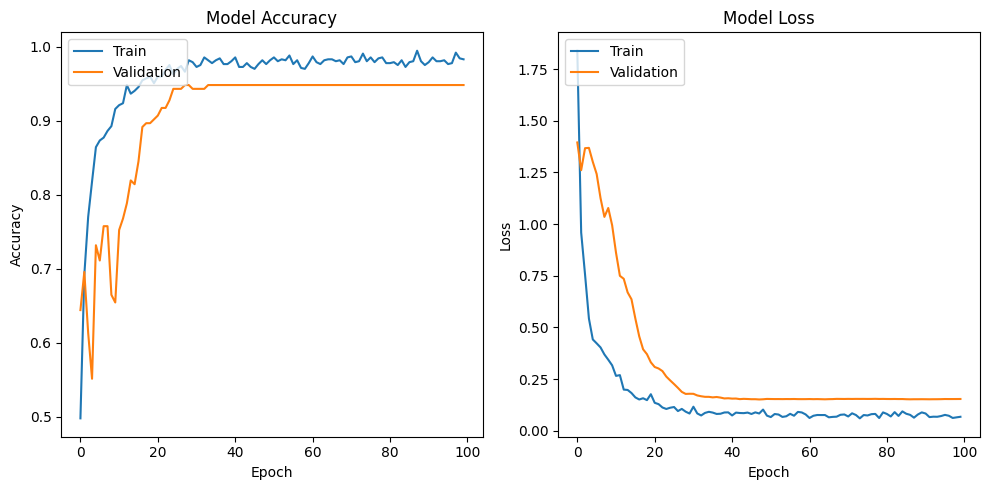

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])  # Use 'accuracy' for training accuracy
plt.plot(history.history['val_accuracy'])  # Use 'val_accuracy' for validation accuracy
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# LSTM mul
X_train = X_train_7525
X_test = X_test_7525
y_train = y_train_7525
y_test = y_test_7525

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    LSTM(units=50, activation='relu'),
    Dense(units=1, activation = 'sigmoid'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32)

_,val_acc = model.evaluate(X_test, y_test)
print("Validation Accuracy :", val_acc*100)

Epoch 1/100
23/23 [==============================] - 2s 9ms/step - loss: 0.0000e+00 - accuracy: 0.4752
Epoch 2/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.4738
Epoch 3/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.4738
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.4738
Epoch 5/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.4738
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.4738
Epoch 7/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.4738
Epoch 8/100
23/23 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.4738
Epoch 9/100
23/23 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.4738
Epoch 10/100
23/23 [==============================] - 0s 9ms/step - loss:

In [ ]:
data = data_cnn
X = data.values
y = mul_y.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

X_train_scaled

array([[-0.18484071, -0.11901105, -0.06959221, ...,  0.12443229,
         0.06807279,  0.0117013 ],
       [ 0.49830383,  0.58736129,  0.65578866, ...,  1.18663388,
         1.23896392,  1.24623998],
       [-0.33534881, -0.3800825 , -0.36729172, ...,  0.29119262,
         0.24390256,  0.17355643],
       ...,
       [-0.02017879,  0.03460164,  0.05044212, ...,  0.89765277,
         0.98904728,  0.97796095],
       [ 0.63252616,  0.64676934,  0.77253625, ...,  0.21495442,
         0.28489287,  0.15116278],
       [-0.49532832, -0.55266113, -0.57480457, ..., -0.89058846,
        -0.77899804, -0.74991128]])

In [ ]:
# CNN-LSTM

model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='softmax')
])

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 12s 408ms/step - loss: 0.0000e+00 - accuracy: 0.1032 - val_loss: 0.0000e+00 - val_accuracy: 0.1161
Epoch 2/20
20/20 [==============================] - 8s 427ms/step - loss: 0.0000e+00 - accuracy: 0.1032 - val_loss: 0.0000e+00 - val_accuracy: 0.1161
Epoch 3/20
20/20 [==============================] - 9s 449ms/step - loss: 0.0000e+00 - accuracy: 0.1032 - val_loss: 0.0000e+00 - val_accuracy: 0.1161
Epoch 4/20
7/7 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - accuracy: 0.1186
Test Loss: 0.0
Test Accuracy: 0.11855670064687729


In [ ]:
data = data_cnn
X = data.values
y = bin_y.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Epoch 1/100
16/16 [==============================] - 4s 59ms/step - loss: 0.7949 - accuracy: 0.5825 - val_loss: 0.5296 - val_accuracy: 0.7302
Epoch 2/100
16/16 [==============================] - 0s 13ms/step - loss: 0.7348 - accuracy: 0.6799 - val_loss: 0.5299 - val_accuracy: 0.7937
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.5961 - accuracy: 0.7078 - val_loss: 0.4266 - val_accuracy: 0.7937
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5742 - accuracy: 0.7256 - val_loss: 0.3599 - val_accuracy: 0.8413
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5660 - accuracy: 0.7376 - val_loss: 0.4029 - val_accuracy: 0.8095
Epoch 6/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5384 - accuracy: 0.7594 - val_loss: 0.3307 - val_accuracy: 0.8651
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4723 - accuracy: 0.7853 - val_loss: 0.3177 - val_accuracy: 0.8492
Epoch 8/10

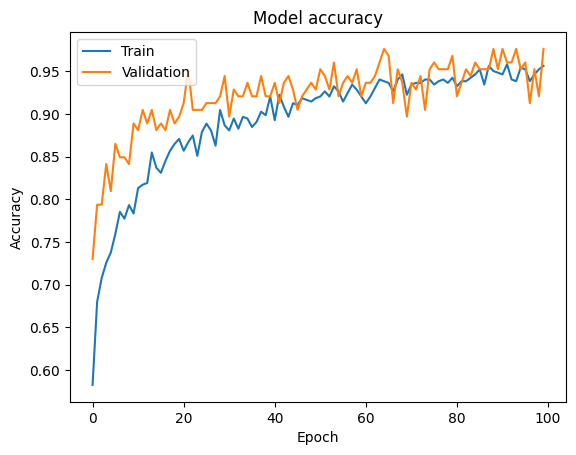

In [ ]:
# ANN
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
data_cnn = df.iloc[:,6:18]
data_cnn

,Cells,QValue,Fat,Protein,Lactose,Solids,FFA,Citrate,FrzPoint,SNF,MUN,Casein
0,82,92.89,3.58,3.37,4.57,12.51,11,1392,0.564,8.93,30.8,2.61
1,66,91.26,3.47,3.38,4.59,12.41,39,1317,0.564,8.97,15.2,2.67
2,895,91.85,3.51,2.98,4.50,11.98,12,1120,0.522,8.63,1.6,2.27
3,151,86.69,3.40,3.22,4.66,12.23,19,1260,0.541,9.21,10.7,2.49
4,527,89.41,3.54,3.17,4.53,12.22,60,1442,0.556,8.66,13.5,2.46
...,...,...,...,...,...,...,...,...,...,...,...,...
964,347,98.48,3.40,3.29,4.32,11.96,34,1540,0.504,8.52,12.0,2.58
965,200,81.75,4.10,3.56,4.75,13.37,31,1214,0.561,9.64,19.6,2.87
966,147,86.00,3.40,3.22,4.67,12.24,16,1263,0.542,9.21,8.8,2.49
967,298,88.35,4.15,3.35,4.73,13.20,14,1101,0.556,9.37,9.5,2.63


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(bin_x, bin_y, test_size=0.35, random_state=42) #Binary
X_train, X_test, y_train, y_test = train_test_split(mul_x, mul_y, test_size=0.35, random_state=42) #Multiclass

In [ ]:
# Support Vector Machine
X_train = np.array(X_train).reshape(X_train.shape[0], -1)
X_test = np.array(X_test).reshape(X_test.shape[0], -1)

svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)
predictions = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5176470588235295


ValueError: X has 2 features, but SVC is expecting 12 features as input.

In [ ]:
# KNN
X_train = np.array(X_train).reshape(X_train.shape[0], -1)
X_test = np.array(X_test).reshape(X_test.shape[0], -1)

knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train, y_train)
predictions = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6352941176470588


Accuracy: 0.85


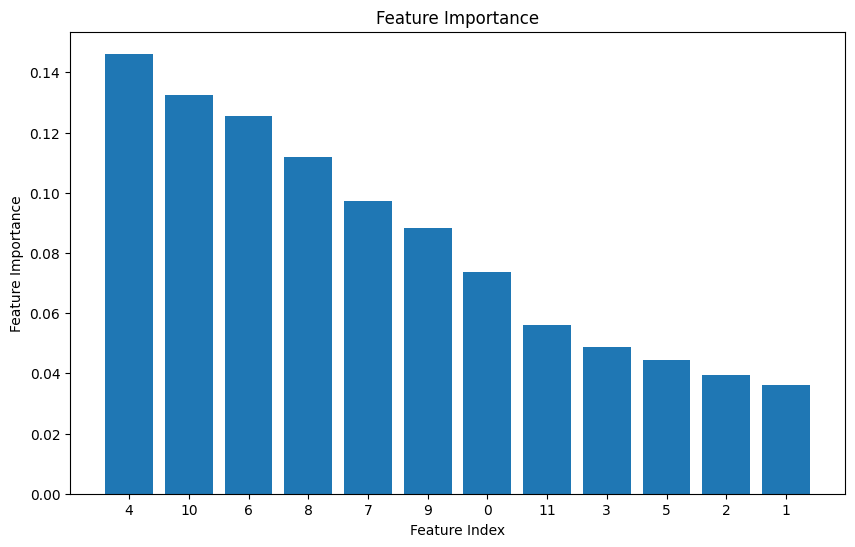

In [ ]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
predictions = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.show()

In [ ]:
# Gradient Boosting Machine
from xgboost import plot_tree

gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_classifier.fit(X_train, y_train)
predictions = gbm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
gbm_classifier.feature_importances_

Accuracy: 0.8205882352941176


array([0.10447625, 0.02442885, 0.00829922, 0.03627027, 0.2905281 ,
       0.02407067, 0.13236302, 0.07072303, 0.04884666, 0.07256261,
       0.15137415, 0.03605715])

In [ ]:

# LightGBM
lgb_classifier = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgb_classifier.fit(X_train, y_train)
predictions = lgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1467
[LightGBM] [Info] Number of data points in the train set: 629, number of used features: 12
[LightGBM] [Info] Start training from score -2.300997
[LightGBM] [Info] Start training from score -2.224624
[LightGBM] [Info] Start training from score -2.512306
[LightGBM] [Info] Start training from score -0.663388
[LightGBM] [Info] Start training from score -2.383688
[LightGBM] [Info] Start training from score -2.269744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [ ]:
# CatBoost
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_seed=42)
catboost_classifier.fit(X_train, y_train)
predictions = catboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

0:	learn: 1.6480095	total: 49ms	remaining: 4.85s
1:	learn: 1.5419243	total: 50.7ms	remaining: 2.49s
2:	learn: 1.4588274	total: 52.5ms	remaining: 1.7s
3:	learn: 1.3896396	total: 54.3ms	remaining: 1.3s
4:	learn: 1.3433189	total: 56.3ms	remaining: 1.07s
5:	learn: 1.2934579	total: 58.1ms	remaining: 910ms
6:	learn: 1.2364129	total: 60.1ms	remaining: 798ms
7:	learn: 1.1972827	total: 62.1ms	remaining: 714ms
8:	learn: 1.1471645	total: 63.8ms	remaining: 645ms
9:	learn: 1.1124100	total: 65.9ms	remaining: 593ms
10:	learn: 1.0784266	total: 68.1ms	remaining: 551ms
11:	learn: 1.0417977	total: 70ms	remaining: 514ms
12:	learn: 1.0187763	total: 72ms	remaining: 482ms
13:	learn: 0.9982822	total: 73.9ms	remaining: 454ms
14:	learn: 0.9777932	total: 75.8ms	remaining: 429ms
15:	learn: 0.9579138	total: 77.8ms	remaining: 408ms
16:	learn: 0.9338267	total: 80ms	remaining: 391ms
17:	learn: 0.9132069	total: 82.1ms	remaining: 374ms
18:	learn: 0.8968542	total: 84.1ms	remaining: 359ms
19:	learn: 0.8821824	total: 86.2

Accuracy: 0.8352941176470589


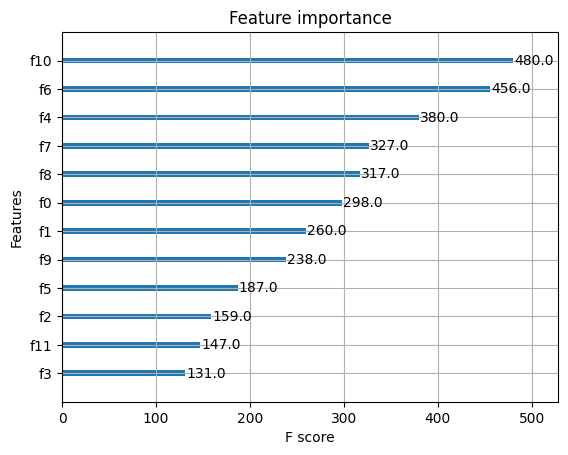

In [ ]:
# XGBoost
from xgboost import plot_tree
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_classifier.fit(X_train, y_train)
predictions = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
xgb.plot_importance(xgb_classifier)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
# Ensemble Voting Classifier
ensemble_classifier = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('gbm', gbm_classifier),
    ('xgb', xgb_classifier),
    ('lgb', lgb_classifier),
    ('catboost', catboost_classifier),
], voting='soft')
ensemble_classifier.fit(X_train, y_train)
predictions = ensemble_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1467
[LightGBM] [Info] Number of data points in the train set: 629, number of used features: 12
[LightGBM] [Info] Start training from score -2.300997
[LightGBM] [Info] Start training from score -2.224624
[LightGBM] [Info] Start training from score -2.512306
[LightGBM] [Info] Start training from score -0.663388
[LightGBM] [Info] Start training from score -2.383688
[LightGBM] [Info] Start training from score -2.269744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [ ]:
data_cnn = df.iloc[:,6:]
data_cnn

,Cells,QValue,Fat,Protein,Lactose,Solids,FFA,Citrate,FrzPoint,SNF,...,SPC 2962,SPC 2966,SPC 2970,SPC 2974,SPC 2977,SPC 2981,SPC 2985,SPC 2989,SPC 2993,SPC 2997
0,82,92.89,3.58,3.37,4.57,12.51,11,1392,0.564,8.93,...,0.096824,0.082412,0.067960,0.054418,0.041527,0.030426,0.021521,0.014404,0.008537,0.003582
1,66,91.26,3.47,3.38,4.59,12.41,39,1317,0.564,8.97,...,0.091569,0.077725,0.062887,0.049003,0.036913,0.027039,0.018343,0.010068,0.003159,-0.001910
2,895,91.85,3.51,2.98,4.50,11.98,12,1120,0.522,8.63,...,0.087129,0.073408,0.059220,0.046008,0.034637,0.024646,0.015802,0.008981,0.003809,-0.000720
3,151,86.69,3.40,3.22,4.66,12.23,19,1260,0.541,9.21,...,0.097520,0.083886,0.068863,0.054876,0.043321,0.033540,0.024578,0.016899,0.011012,0.006048
4,527,89.41,3.54,3.17,4.53,12.22,60,1442,0.556,8.66,...,0.088662,0.074045,0.059094,0.045218,0.033200,0.023450,0.015204,0.007179,-0.000310,-0.005550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,347,98.48,3.40,3.29,4.32,11.96,34,1540,0.504,8.52,...,0.091714,0.077592,0.062860,0.049189,0.037669,0.028057,0.019258,0.011206,0.004270,-0.000454
965,200,81.75,4.10,3.56,4.75,13.37,31,1214,0.561,9.64,...,0.097472,0.080994,0.063711,0.048035,0.034527,0.022658,0.012867,0.004813,-0.002039,-0.007576
966,147,86.00,3.40,3.22,4.67,12.24,16,1263,0.542,9.21,...,0.096722,0.082313,0.067213,0.054163,0.042833,0.032504,0.023497,0.015788,0.009637,0.004912
967,298,88.35,4.15,3.35,4.73,13.20,14,1101,0.556,9.37,...,0.100560,0.084209,0.066859,0.051367,0.038372,0.027638,0.018606,0.010341,0.003644,-0.001038


In [ ]:
data = data_cnn
X = data.values
y = bin_y.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train_6535, X_test_6535, y_train_6535, y_test_6535 = train_test_split(X_scaled, y, test_size=0.35, random_state=42)
X_train_7525, X_test_7525, y_train_7525, y_test_7525 = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
X_train_8020, X_test_8020, y_train_8020, y_test_8020 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# CNN Bin
X_train = X_train_8020
X_test = X_test_8020
y_train = y_train_8020
y_test = y_test_8020

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential([
    Conv1D(filters=32, kernel_size=5, activation='linear', input_shape=(X_train.shape[1], 1)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(1024),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

initial_learning_rate = 0.001
lr_schedule = LearningRateScheduler(lambda epoch: initial_learning_rate * 0.9 ** epoch)
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_schedule])

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/100
25/25 [==============================] - 17s 612ms/step - loss: 1.1030 - accuracy: 0.7329 - val_loss: 0.3917 - val_accuracy: 0.8093 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 12s 465ms/step - loss: 0.3377 - accuracy: 0.8684 - val_loss: 0.4802 - val_accuracy: 0.7371 - lr: 9.0000e-04
Epoch 3/100
25/25 [==============================] - 11s 447ms/step - loss: 0.2800 - accuracy: 0.8929 - val_loss: 0.4632 - val_accuracy: 0.7423 - lr: 8.1000e-04
Epoch 4/100
25/25 [==============================] - 11s 445ms/step - loss: 0.2522 - accuracy: 0.9148 - val_loss: 0.4540 - val_accuracy: 0.7526 - lr: 7.2900e-04
Epoch 5/100
25/25 [==============================] - 11s 416ms/step - loss: 0.1647 - accuracy: 0.9381 - val_loss: 0.4220 - val_accuracy: 0.8093 - lr: 6.5610e-04
Epoch 6/100
25/25 [==============================] - 11s 451ms/step - loss: 0.1882 - accuracy: 0.9329 - val_loss: 0.3941 - val_accuracy: 0.8299 - lr: 5.9049e-04
Epoch 7/100
25/25 [===================

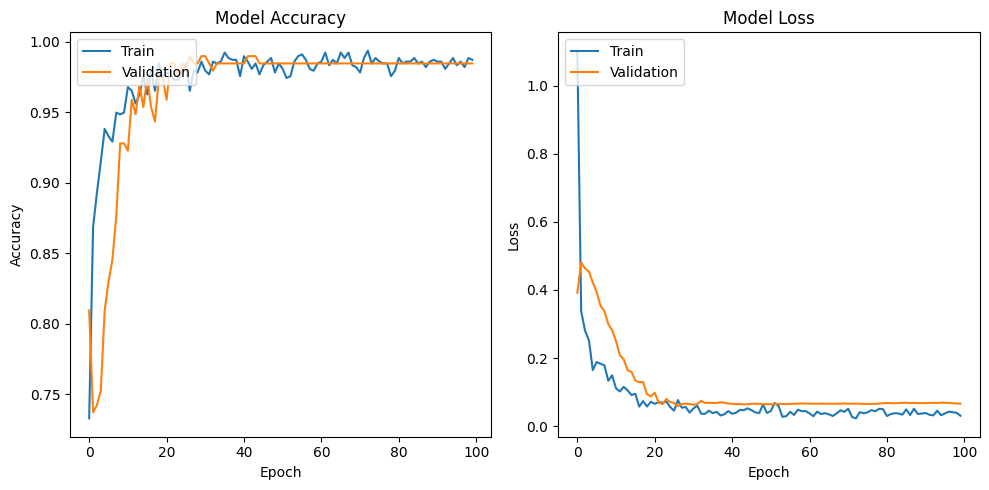

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])  # Use 'accuracy' for training accuracy
plt.plot(history.history['val_accuracy'])  # Use 'val_accuracy' for validation accuracy
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
data = data_cnn
X = data.values
y = bin_y.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)